In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.signal import savgol_filter

In [11]:
data_red = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/красный диод/калибровка красный.txt')
data_green1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/зеленый диод/калибровка.txt')
data_rainbow = np.loadtxt("/Users/arpolkin/HSE/лабы/ласт трай/mat-/белый диод.txt")

In [82]:
def f(x,mu,sigma2,n):
    return n*np.exp(-(x-mu)**2/2/sigma2)
def f1(x,sigma2):
    return f(x,59,sigma2,250)

In [13]:
opt_red = opt.curve_fit(f,xdata,data_red[:,0],p0=[650,10,250])[0]
red_center = opt_red[0]
opt_green1 = opt.curve_fit(f,xdata,data_green1[:,1],p0=[250,10,250])[0]
green1_center = opt_green1[0]

In [72]:
xdata = np.arange(0,data_green1.shape[0])
l_step = (635.-532.)/(red_center-green1_center)
l_grid = (xdata-xdata[int(green1_center)])*l_step + np.ones_like(xdata)*532.

In [15]:
pink_wid = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/розовая в ширину.txt')
pink_len = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/розовая в длину.txt')
orange_wid = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/рыжая в ширину.txt')
orange_len = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/рыжая в длину.txt')
empty = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/пустая кювета.txt')
blue_wid = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/голубая в ширину.txt')
green_wid = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/зеленая в шиирину.txt')
green_len = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/зеленая в длину.txt')

In [110]:
opt_empty0 = opt.curve_fit(f,xdata[400:],empty[400:,0],p0=[475,1,100])[0]
opt_empty1 = opt.curve_fit(f,xdata,empty[:,1],p0=[350,10,200])[0]
opt_empty2 = opt.curve_fit(f,xdata[:200],empty[:200,2],p0=[59,10,250])[0]

In [79]:
np.argmax(empty[:,2])

59

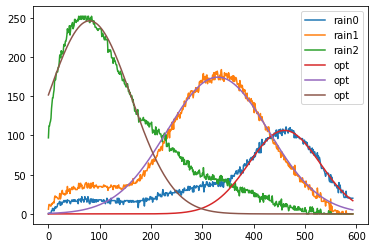

In [111]:
data_rainbow = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/пустая кювета.txt')#np.loadtxt("спектр диода.txt")
#blue_wid = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/голубая в ширину.txt')
#data_rainbow[:,2] = data_rainbow[:,2]-blue_cut#data_rainbow[:,2][200]
#data_rainbow[:,1] = data_rainbow[:,1]-red_cut#data_rainbow[:,1][100]
#data_rainbow[:,0] = data_rainbow[:,0]-green_cut#data_rainbow[:,0][400]
#blue_wid[:,2] = blue_wid[:,2]-blue_cut#blue_wid[:,2][250]
#blue_wid[:,1] = blue_wid[:,1]-blue_wid[:,1][100]
#blue_wid[:,0] = blue_wid[:,0]-blue_wid[:,0][400]
for i in range(3):
    data_rainbow[:,i][data_rainbow[:,i]<0]=0
  #  blue_wid[:,i][blue_wid[:,i]<0]=0
for i in range (3):
 #   plt.plot(blue_wid[:,i],label="{}".format(i))
    plt.plot(data_rainbow[:,i],label="rain{}".format(i))
plt.plot(f(xdata,*opt_empty0),label="opt")
plt.plot(f(xdata,*opt_empty1),label="opt")
plt.plot(f(xdata,*opt_empty2),label="opt")
plt.legend()


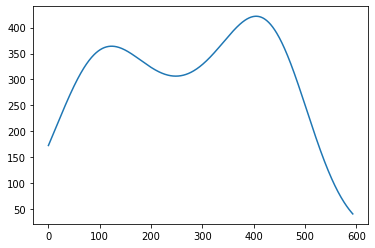

In [113]:
led_int = (np.sqrt(f(xdata,*opt_empty0))+np.sqrt(f(xdata,*opt_empty1))+np.sqrt(f(xdata,*opt_empty2)))**2
plt.plot(led_int)

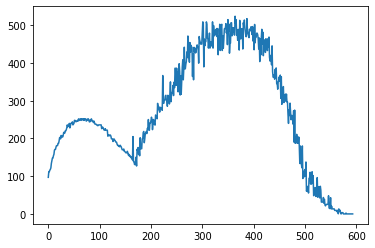

In [116]:
blue_cut = 0#50+0*np.max(empty[250:,2])
red_cut = 1*np.max(empty[:100,1])#np.max(np.loadtxt('пустая кювет.txt')[:100,1])
green_cut = 2/3*red_cut#*np.max(empty[:350,0])
def intensity(arr):
    int_ar = np.zeros_like(l_grid)
    arr_add = arr.copy()
    arr_add[:,2] = arr_add[:,2]-blue_cut#np.mean(arr_add[350:,2])
    arr_add[:,1] = arr_add[:,1]-red_cut#np.max(arr_add[:130,1])#arr_add[:,1][100]
    arr_add[:,0] = arr_add[:,0]-green_cut#np.max(arr_add[:400,0])#arr_add[:,0][400]
    for i in range(3):
        arr_add[:,i][arr_add[:,i]<0]=0
        #print(np.min(arr_add))
    for i in range(3):
        int_ar = int_ar + np.sqrt(arr_add[:,i])
        #print(np.min(int_ar))
    return int_ar**2#savgol_filter(int_ar**2, 51, 2)
#w = savgol_filter(intensity(data_rainbow), 51, 2)
plt.plot(intensity(empty))


In [3]:
type((1-2)/100*200)

float